In [1]:
# Importamos librerías
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Cargamos los datos
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Limpiamos los datos
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) # Usamos una función de Pandas para transformar la columna de 'str' a 'datetime'
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # Usamos un módulo de Python para transformar la columna de 'str' a 'list'

In [2]:
# Creamos un df que sólo contenga los trabajos remotos
df_homeoffice = df[(df['job_title_short'] == 'Data Analyst') & df['job_work_from_home'] == True].copy()

# Excluimos los salarios nulos para una visualización coherente
df_homeoffice = df_homeoffice.dropna(subset=['salary_year_avg'])

df_homeoffice_exploded = df_homeoffice.explode('job_skills')


In [3]:
# Agrupamos los trabajos según la skill y la mediana del salario
df_DA_skills = df_homeoffice_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

df_DA_skills

,skill_count,median_salary
job_skills,,
sql,402,90000.0
excel,261,82500.0
python,236,95000.0
tableau,234,92500.0
r,147,90000.0
...,...,...
erlang,1,72500.0
elasticsearch,1,145000.0
datarobot,1,155485.5


In [4]:
# Buscamos el porcentaje de requerimiento de cada skill
df_homeoffice_count = len(df_homeoffice)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / df_homeoffice_count * 100

df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,402,90000.0,65.901639
excel,261,82500.0,42.786885
python,236,95000.0,38.688525
tableau,234,92500.0,38.360656
r,147,90000.0,24.098361
...,...,...,...
erlang,1,72500.0,0.163934
elasticsearch,1,145000.0,0.163934
datarobot,1,155485.5,0.163934


In [5]:
# Filtramos para obtener las skills que tengan al menos 5% de requerimiento
skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

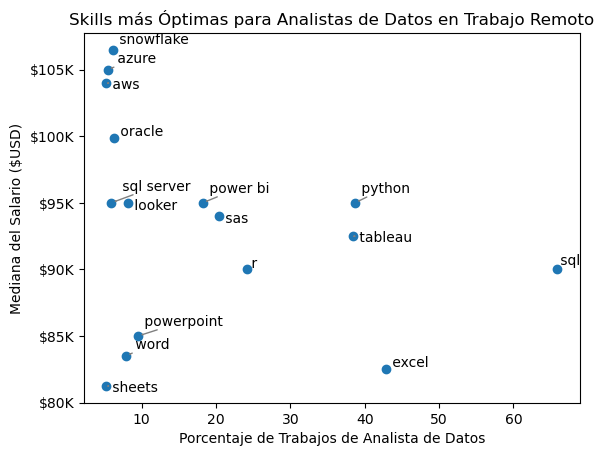

In [6]:
# Realizamos la visualización de interés
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Porcentaje de Trabajos de Analista de Datos')
plt.ylabel('Mediana del Salario ($USD)')
plt.title('Skills más Óptimas para Analistas de Datos en Trabajo Remoto')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()